# Wealth Distribution: Examples

We can import the python objects defined on our `wealth_distribution` application in this jupyter notebook. Remember that you might need to "restart the kernel" (`Kernel > Restart`) and re-run the cell blocks to get the latest changes.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

from wealth_distribution.main import Main
from wealth_distribution.models import Agent, Economy

## Agent

Once you implement the `win` & `lose` methods on the `Agent` class you should be able to create an `angent` and increase/decrease the amount of money:

In [2]:
agent = Agent(100)

# You should be able to win 20 monetary units
agent.win(amount=20)
assert agent.money == 120

# You should be able to lose 10 monetary units
agent.lose(amount=10)
assert agent.money == 110

Two different agents should be able to trade. The total amount of money must always remain the same. 

In [3]:
agent_a = Agent(100)
agent_b = Agent(100)

# Two agents should be able to trade
trading_amount = 25
agent_a.trade(agent_b, amount=trading_amount)

assert agent_a.money + agent_b.money == 200
assert abs(agent_a.money - agent_b.money) == 2*trading_amount

**Note**: The the trade should not do anything IF the loser agent do not has enough money.

In [17]:
# This trade should not be effective since the loser doesnt has enough money.
a = Agent(money=10)
b = Agent(money=10)

a.trade(b, amount=20)

# Test 1
assert a.money == 10
assert b.money == 10

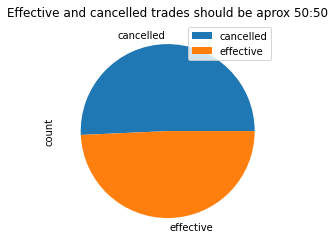

In [34]:

def trading_pair():
    a = Agent(money=10)
    b = Agent(money=0)
    a.trade(b)
    if a.money == 10:
        return "cancelled"
    return "effective"

# Test 2: plot
pd.DataFrame([{"tag": trading_pair()} for _ in range(10000)])\
    .groupby("tag").size().reset_index(name="count").set_index("tag")\
    .plot.pie(y="count")
plt.title("Effective and cancelled trades should be aprox 50:50")
plt.show()

## Economy

### Create a new economy

In [67]:
# Start the economy
economy_a = Economy(
    population=200,
    initial_amount=500,
    trading_sample=0.5,
    sessions_per_epoch=50
)

The first few simulation should create a normal distribution.

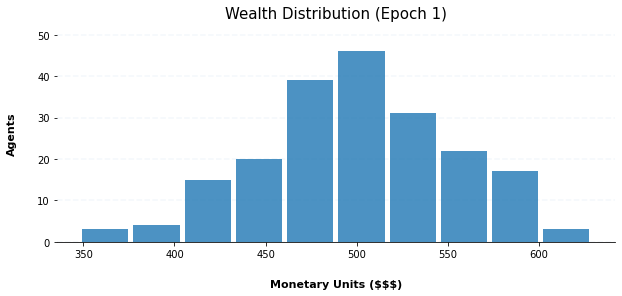

In [68]:
# Simulate first epoch
economy_a.epochs(n=1)
fig = economy_a.plot_histogram()

After a few epochs the distribution should start changing.

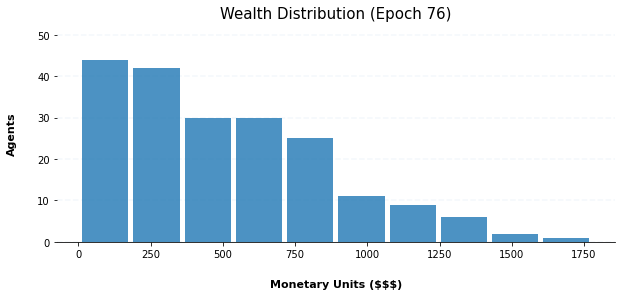

In [69]:
# Simulate 75 more epochs
economy_a.epochs(n=75)
fig = economy_a.plot_histogram()

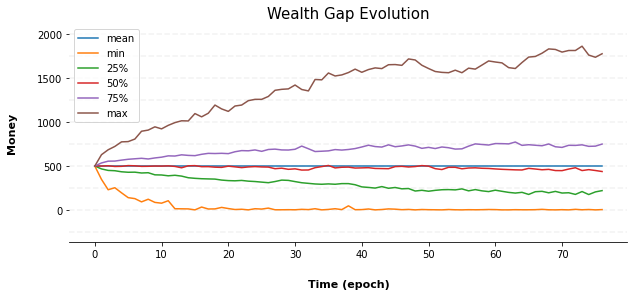

In [70]:
fig = economy_a.plot_timeseries()

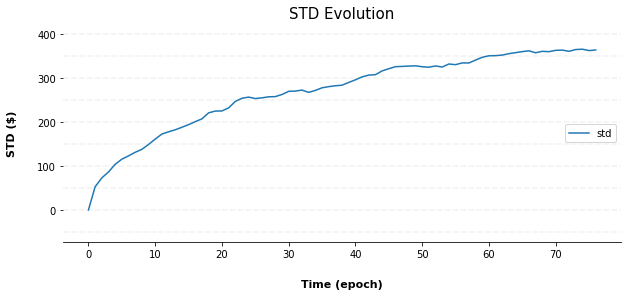

In [71]:
fig = economy_a.plot_std()

### Load a simulation

In [78]:
simulation_path = "wealth_distribution/simulations/cacf5dd4-ac9a-4dab-b78b-bfa7ceb41db1"
economy_b = Economy.from_file(file_path=simulation_path)

In [80]:
economy_b.get_data()

,agent_id,money
0,7eeac009-760c-43d1-afa4-3827c4b55328,886
1,910cf5c8-96e3-406f-b5f4-91bcf183fea2,2198
2,2332db36-9420-411e-85ca-21bf7c4b6fbe,203
3,84640cda-f7c8-453d-8eb2-1f6e287a6a7b,259
4,20bfb3de-0ed8-448c-842f-22168c9accf5,655
...,...,...
495,4f51d842-1efb-4045-9b24-146c3f6b7e5e,1561
496,dd883a93-3734-44c5-8b46-b1d9a81e7256,238
497,8333e5c2-0f48-4027-b9b5-92ac6cf755b9,1823
498,15632cf3-f968-4948-83b3-e6267b02798b,1015


In [81]:
economy_b.get_stats()

{'count': 500.0,
 'mean': 1000.0,
 'std': 734.8718345578724,
 'min': 1.0,
 '25%': 392.25,
 '50%': 874.0,
 '75%': 1461.0,
 'max': 4200.0}

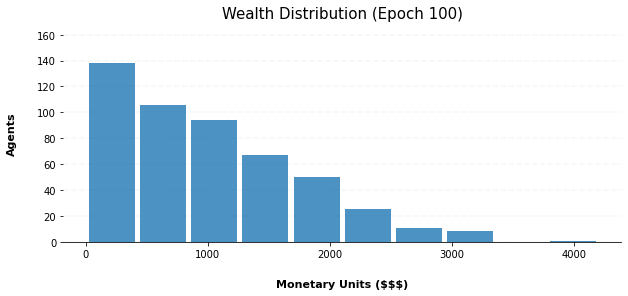

In [79]:
fig = economy_b.plot_histogram()